# COGS 118A - Final Project

# Comparison of Model Performance in Sentiment Analysis

## Group members

- Deepansha Singh
- Raina Song
- Ilya Kogan
- Winah Ruiz


# Abstract 
Natural language processing (NLP) has been making headlines all over the news in recent months due to the release and gaining popularity of ChatGPT (chatbot developed by OpenAI).
To take a closer look at the field of NLP, we plan to implement a sentiment analysis, a NLP technique that is used to determine the text attitude on a scale from -1 to 1 where absolute positive input has score 1, absolute negative input has score of -1, and a score of 0 is for neutral sentiment.
In this project we examine how general a sentiment analysis tool can be 
(e.g. when trained on data on a specific topic how well it can perform on other topics that it didn’t encounter before or general topicless data) 
by using different sampling techniques 
(k-fold Cross Validation and Nested Cross Validation) 
with different classifiers 
(Support Vector Classifier, k-Nearest Neighbors algorithm, Decision Trees, etc.) 
and quantifying their performance using various error metrics 
(precision, recall, or accuracy scores).
We will be using social media data from Reddit with sentiment labels to train our models, choose the best one according to an error metric, and then test how well our “best” model performs on a new dataset found on Twitter.


# Background

In previous studies, the generalisability and interoperability of NLP models in tasks such as fake news detection<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews)<a name="fakenews2"></a>[<sup>[2]</sup>](#fakenews2), hate speech detection<a name="hatespeech"></a>[<sup>[3]</sup>](#hatespeech), and sentiment analysis<a name="sentian"></a>[<sup>[4]</sup>](#sentian) were explored. It was found that generalisability is a challenge for NLP algorithms, as they generalize poorly on new and unseen datasets<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews). However, robust NLP models are desired to perform large-scale, cross-categorical classification tasks on the internet or social media platforms. Some studies suggest that the biases found in models may be due to the small datasets the models are trained on, which make the models prone to overfitting issues<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews). Larger and more diverse datasets are required to reduce biases in trained models. It was suggested that cross-dataset testing is a useful tool to evaluate model generalisability performance realistically<a name="hatespeech"></a>[<sup>[3]</sup>](#hatespeech). Due to such reasons, our project is motivated to explore the generalisability of NLP sentiment analysis models on different datasets pertaining to different subject matter.


# Problem Statement

We are performing one of the techniques to quantify text, sentiment analysis, using different classifiers. We are then examining how well our model trained on The Reddit Climate Change Dataset<a name="redditclimate"></a>[<sup>[5]</sup>](#redditclimate) can perform on Twitter and Reddit Sentimental Analysis Dataset<a name="twitterredditsentian"></a>[<sup>[6]</sup>](#twitterredditsentian) and FIFA World Cup 2022 Tweets<a name="fifatweets"></a>[<sup>[7]</sup>](#fifatweets) by using different error metrics (precision, recall, or accuracy scores) and how does a choice of error metric change what is the best model (i.e. whether we have a completely best model or not). One potential solution to our problem is to use CountVectorizer to do the preprocessing, then extract features using tf-idf frequincies approach after which fit some classifiers (e.g. Support Vector Classifier, k-NN, Decision Trees, and AdaBoost) on The Reddit Climate Change Dataset<a name="redditclimate"></a>[<sup>[5]</sup>](#redditclimate). Then, use an error metric, for example, precision or recall and a confusion matrix for visualizations to determine which Classifier gives the best performance on different datasets using, for example, k-fold Cross Validation or Nested Cross Validation.

# Data


### (pavellexyr) The Reddit Climate Change Dataset: ###
Retrieved from: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

There are two .csv files, one containing comments from Reddit on climate change and the other containing posts on climate change. For this project, we will only be using the .csv file with comments as there is already sentiment analysis done on the 4.6 million observations collected.

An observation in this dataset consists of:
* Type of datapoint (comment)
* Unique ID of the comment
* Unique ID of the comment’s subreddit
* The name of the subreddit the comment was found on
* If the comment’s subreddit is NSFW
* The timestamp (UTC) of the comment
* Permalink to the comment
* Body text of the comment
* Analyzed sentiment for the comment as a continuous value from [-1, 1]
* Comment’s score (votes on Reddit)

### (cosmos98) Twitter and Reddit Sentimental analysis Dataset: ###
Retrieved from: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

There are two .csv files, one containing comments from Reddit (36k observations) and the other containing tweets from Twitter (162k observations). The Twitter dataset was extracted with the focus on tweets people made about the Indian Prime Minister Narendra Modi. The Reddit dataset has no indication of having a specific area or topic they were sourced from. 

Both datasets only have two variables:
* The text of the comment or tweet
* The category/sentiment of the text {-1, 0, 1}

### (tirendazacademy) FIFA World Cup 2022 Tweets:  ###
Retrieved from: https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets

There is one .csv file containing tweets regarding the 2022 FIFA World Cup, a dataset of about 22k observations.

An observation in this dataset contains:
* ID (index) of the observation
* Date the tweet was created
* Number of likes the tweet had
* Source of the tweet (Twitter of iPhone, Twitter for Android)
* The body text of the tweet
* Sentiment of the tweet as strings: “positive”, “neutral”, or “negative”


For all the datasets discussed above, there are only two variables we are concerned with: the text of the comment/tweet and the sentiment the text was already given. Due to some datasets being incredibly large, only the first 100k observations of each dataset will be used. 

All datasets will undergo further data cleaning. To the best of our ability, we will filter our dataset to only have English detected text using the langdetect library and regex. Other unusable observations (such as rows containing NaN values) will also be excluded. This results in slightly less than the upper limit of 100k observations initially taken from each dataset. In addition, the existing numeric labels for sentiment some datasets may have will be changed to string values of “positive”, “negative”, and “neutral” to be consistent with each other and only have 3 total classes for classification. 

The full code for cleaning the files used up to this point are in the “COGS118A replacement data cleaning.ipynb” file in this repository. Below will be code snippets, mainly of the functions created to clean the data. For demonstration purposes, these will just be example variable names instead of what was actually used in practice. 


In [4]:
"""
Libraries and global variables to be used for cleaning and limiting collected data to 100k observations at most. 
"""

import numpy as np
import pandas as pd

row_count = 1000
max_obv = 100

#https://pypi.org/project/langdetect/
### uncomment this to install, then comment and restart kernel ###
# %%capture
# !pip install langdetect

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
### regex for more lang checking
import re

Taking the first 100k observations of a dataset and putting it into an initial DataFrame object.

In [2]:
data_text = []
data_sentiment = []
i = 0
for chunk in pd.read_csv('dataset.csv', chunksize=row_count):
  if i < max_obv:
    data_text += chunk['text'].tolist()
    data_sentiment += chunk['sentiment'].tolist()
    i += 1
  else:
    break;

In [3]:
df = pd.DataFrame(data={'text': data_text, 'sentiment': data_sentiment})
df = df.dropna()

Function to validate a text body. Valid text will be non-empty strings that are not solely whitespace of at least length 1. Regex and langdetect is used to keep observations that have Latin characters (so that it may be able to filter out text using solely Korean characters for example).

In [ ]:
def validate_line(line):
    if not line:
        return np.nan
    if line == "":
        return np.nan
    if not bool(line.strip()):
        return np.nan
    if len(line) < 1:
        return np.nan
    
    if bool(re.match('^(?=.*[a-zA-Z])', line)):
        try:
            if detect(line) != 'en':
                return np.nan
        except LangDetectException:
            return np.nan
    return True

Function to check if text body is English (detect returns 'en') for the entire dataset. 
* text_col takes a DataFrame.Series: df['text']
* sentiment_col takes a DataFrame.Series: df['sentiment']
Returns 3 lists of the same length, truncating the last chunk of observations that are less than 1000.

In [ ]:
def check_en(text_col, sentiment_col):
    en_text = text_col.tolist()
    en_sentiment = sentiment_col.tolist()
    lang = []
    
    start = 0
    for i in np.arange(row_count, len(en_text), row_count):
        #observations <1000 at the end will be lost but impact is negligible
        #!!!uncomment print statement below to show progress (recommended)!!!
#         print(start, i)
        lang += [validate_line(x) for x in en_text[start:i]]
        start = i
    print("Finished English check")
    ### all three return values should be of the same length
    return en_text[0:len(lang)], en_sentiment[0:len(lang)], lang

Putting the returned lists from check_en into a new DataFrame. df['english'] will be dropped after removing all rows with NaN values (non-English, non valid text bodies).

In [ ]:
en_data_text, en_data_sentiment, en_data_lang = check_en(df['text'], df['sentiment'])

en_df = pd.DataFrame(data={'text': en_data_text, 'sentiment': en_data_sentiment, 'english': en_data_lang})
en_df = en_df.dropna()
en_df = en_df.drop(columns=['english'])

Function to change numeric sentiment values into string values, otherwise it will just return the input value (if it was already string).

In [ ]:
def sentiment_to_string(sentiment):
    if type(sentiment) == int or type(sentiment) == float:
        if sentiment < 0:
            return "negative"
        if sentiment > 0:
            return "positive"
        return "neutral"
    else:
        return sentiment

In [ ]:
en_df['sentiment'] = en_df['sentiment'].apply(sentiment_to_string)

Further cleaning is done to remove user handles, most links, and most special characteres. Stemming is also done to simplify tokens, which are then put back together as a single body of text.

In [2]:
#packages needed
import pandas as pd
import regex as re
import nltk
from nltk import PorterStemmer
ps = PorterStemmer()

In [4]:
def further_cleaning(df):
  #remove urls
  df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x, flags=re.MULTILINE))
  #remove user handles
  df['text'] = df['text'].apply(lambda x: re.sub(r'@[\w]*', '', x))
  #remove special characters
  df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
  #remove strings less than length 3
  df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

  #tokenizing and stemming
  token = df['text'].apply(lambda x : x.split())
  token = token.apply(lambda x: [ps.stem(i) for i in x])
  
  #rejoin tokens
  for i in range(len(token)):
    token[i] = ' '.join(token[i])
  df['text'] = token
  return df


Final DataFrame after this line with the prefix "new_" and found on this folder: https://drive.google.com/drive/folders/14NlphpE3kazUTVJp7Ecua7sEo6nFoaW7?usp=sharing

In [ ]:
new_df = further_cleaning(en_df)

# Proposed Solution

We have considered 3 different approaches for the proposed solution. For all three approaches, we aim to train different classifiers on a labelled dataset that we mentioned before, and test them on different labelled datasets to achieve the cross-dataset testing as mentioned in the Background section. This way, we can try to find out the generalisability of the models on different datasets and answer our research question. Also, in each approach, different classifiers are evaluated and tested against our metrics and we will select the best model in each approach. For approaches 1 and 2, we are looking at supervised machine learning methods for the classifiers. And for approach 3, which is beyond the scope of the class (but if we have extra time) we will also do some exploration for some deep learning package’s accuracy on the dataset.
<br>

**Approach #1 : Supervised ML, using scikit packages to take care of BOTH the data preprocessing and also the NLP feature extraction.**

All the preprocessing will be taken care of by the CountVectorizer.
Please note that we are following this tutorial from the Scikit documentation <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1). Since we haven’t previously worked with natural language processing problems in class before, we are  following this tutorial’s methods for feature extraction. Additionally, we did a lot of thorough, extensive research on various approaches for extracting features for text input. Some features <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1)<a name="featextract"></a>[<sup>[9]</sup>](#featextract) we would be looking at are bag-of-words feature, tf-idf frequencies <a name="wiki"></a>[<sup>[10]</sup>](#wiki), and word embeddings <a name="mediium"></a>[<sup>[11]</sup>](#medium). 

Specifically, for the tf-idf frequencies, based on the research we did <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1), <a name="wiki"></a>[<sup>[12]</sup>](#wiki), tf-idf is a great way to see how important each of these words in the text are; tf-idf stands for term frequency-inverse document frequency. For tf-idf, we need to use the "CountVectorizer" object from scikit <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1) to get the frequencies and then we can use that for this tf-idf computation. While the tf part is more focused on seeing how frequently each of these words are in our training set, the idf portion of the computation is more focused around information theory aspect and assessing the relevance of the word <a name="wiki"></a>[<sup>[10]</sup>](#wiki).

After extracting all the various features, the next step would be to run the various classifiers <a name="scikit2"></a>[<sup>[12]</sup>](#scikit2) on the training dataset. Specifically, these are the following classifiers we are planning on running on these features as discussed in class: Support Vector Classifier, K-nearest neighbors, and Decision trees.
Some new classifiers, which we haven’t learned in class yet, which we are also planning to investigate in further detail are neural net, Naive Bayes, Ada Boost, etc. <a name="scikit2"></a>[<sup>[12]</sup>](#scikit2). We will be comparing these classifiers on different datasets and select the best model based on our metrics. 

In addition, for the training sampling techniques, we will be using the following to do comparisons between the different methods that we learned in class: K-fold validation with training, with training/validation/testing, and Nested cross validation. 
<br>

**Approach #2: Supervised ML, doing data preprocessing and above feature extraction from scratch.**

The steps for this approach will be similar to the first approach, however for the data preprocessing we will be doing everything from scratch instead of using CountVectorizer. 
Specifically, these are some of the data preprocessing techniques that we have researched about <a name="empstudy"></a>[<sup>[13]</sup>](#empstudy)<a name="featextractreview"></a>[<sup>[14]</sup>](#featextractreview) for natural language processing sub-field of machine learning are lemmatization/stemming, tokenization, and looking at part of speech for text.
Additionally, we will be looking at more research papers and trying to see more data preprocessing techniques for text input data.
We will again compare and contrast each classifier, and select the best model in this approach.
<br>

**Approach #3 (Above & Beyond, Extra work outside of class algorithms): Running on pre-trained neural networks.**

Along with supervised ML approaches, there has been a lot of extensive, thorough research being done in deep learning space for Natural Language Processing. Google’s BERT and Open AI’s GPT-3 <a name="top8"></a>[<sup>[15]</sup>](#top8) are just two of the popular NLP deep learning models out there. 
We will be loading these pretrained models in the Pytorch library. This is a library we haven’t learned in class, but is widely used in deep learning research problems. Specifically, this is new Machine learning content, in deep learning and transformers space, and we spent time understanding these really cool new ML concepts (links below). 
After performing the above tasks for the supervised machine learning component of the project, we will also be comparing the accuracy of this model to various pretrained models from HuggingFace for sentiment analysis, and see which model provides best accuracy, specifically BERT pretrained model <a name="huggingface1"></a>[<sup>[16]</sup>](#huggingface1) and Chat GPT-2 pretrained model <a name="huggingface2"></a>[<sup>[17]</sup>](#huggingface2).

If time permits, we will also try to train a neural network from scratch for sentiment analysis and do further research on research papers in this space. 

For all these different classification models, after we selected the best model by observing the results they produce on the labelled datasets, we will test them against an unlabelled dataset and see how accurate they seem on the unlabelled dataset compared to the labelled ones they were trained and tested on. In such a way, we can see not only the cross-dataset testing results on the generalisability of models we selected, and also the predictability of the models when they don't have labelled data.


# Evaluation Metrics

We will be using various different error metrics such as precision, recall, and overall accuracy score to evaluate how well those classifiers can generalize in sentiment analysis given different subject matter, and if there is a significant difference in performance between each classifier. Precision and recall will also be used to judge how sensitive our classifiers are to negative and positive sentiments, providing insight as to what pitfalls they are subject to in the human language such as sarcasm.

$$Precision = {True Positives \over Predicted Positives}$$
$$Recall = {True Positives \over Actually Positive}$$
$$Overall Accuracy = {True Positives + True Negatives \over Total Predictions Made}$$

We will also use a confusion matrix<a name="confusionMatrix"></a>[<sup>[18]</sup>](#confusionMatrix) to visually represent True Positives, False Negatives, False Positives, and True Negatives, since they are the basis using which precision, recall, and overall accuracy are evaluated. A general Confusion Matrix looks like this:

|                    |Predicted Positive(PP)| Predicted Negative(PN)|
| ------------------ | -------------------- | --------------------- |
| Actual Positive(P) |    True Positives    |    False Negatives    |
| Actual Negative(N) |    False Positives   |    True Negatives     |

# Results

In “COGS118A model training.ipynb”, there is a notebook that has all the helper functions, libraries, and graphs for training /validation curves and metric reports for all the models were trained, fit, and tested on for certain datasets. The notebook itself is quite dense with code, but all visualizations are in a separate folder “Visualization images”. 

In the Data section, there was code for further data cleaning (datasets and files with the prefix “new_”) but ultimately, the changes were negligible or even made the results worse with less data. Rather than re-running our code and showing those results, the following sections use files with the “en_” prefix which were our original ‘clean’ datasets.

### Trained and Tested on FIFA Dataset

The FIFA (“en_fifa_df.csv”) dataset was the smallest dataset with about 22k usable observations. Because of this, it was used in a train/test split for 12 models: KNN, SVM, Random Forest, Logistic Regression, Decision Tree, Perceptron, SGD, Neural Network, Gradient Boosting, Adaboost, Naive Bayes, and Linear SVM. 

From the above trained models, SVM, SGD, Logistic Regression, and Linear SVM have the highest accuracies (>=0.70) and had f1-scores above 0.60 for all three sentiment categories “negative”, “neutral”, and “positive”. 

### Visualizations on Best Models from FIFA Train/Test

The rest of the visualizations for the other models trained and tested on the FIFA dataset can be found in the “Visualization images” folder.

We first present all the general code, then one example of code followed by the Visualization. All other visualizations were obtained in a very similar manner, details can be seen in "COGS118 model training.ipynb".

In [ ]:
#necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

#loading dataset function
def load_data(dataset_path):
    dataset = pd.read_csv(dataset_path)
    X = dataset['text']
    Y = dataset['sentiment']
    return X, Y


#training the model function
def train_model(dataset_path):
    X, Y = load_data(dataset_path)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, train_size=0.6)

    countVectorizer = CountVectorizer()
    X_train = countVectorizer.fit_transform(X_train)

    tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
    X_train = tf_transformer.transform(X_train)

    return X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer


#testing model function
def test_model(clf, X_test, Y_test, countVectorizer, tf_transformer):
    X_new_counts = countVectorizer.transform(X_test)
    X_new_tfidf = tf_transformer.transform(X_new_counts)
    predicted = clf.predict(X_new_tfidf)
    classification_report = metrics.classification_report(Y_test, predicted)
    print(classification_report)
    return classification_report


#confusion matrix plotting function
def plot_confusion_matrix(clf, X_test, Y_test, title, countVectorizer, tf_transformer):
    X_new_counts = countVectorizer.transform(X_test)
    X_new_tfidf = tf_transformer.transform(X_new_counts)
    y_pred = clf.predict(X_new_tfidf)
    cm = confusion_matrix(Y_test, y_pred)
    plt.matshow(cm)
    plt.title(title, y=1.2)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # use positive, negative, neutral as labels
    labels = ['negative', 'neutral', 'positive']
    plt.xticks([0, 1, 2], labels)
    plt.yticks([0, 1, 2], labels)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x=j, y=i, s="{:.1%}".format(cm[i, j]/np.sum(cm[i, :])), va='center', ha='center', color='white')
    # save the plot as a png file
    plt.savefig("Visualisation images/" + title + '.png')
    plt.show()
    

#plotting learning curve function
def plot_learning_curve(clf, X_train, Y_train, model_name):
    # plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel(model_name + " Model Learning Curve")
    plt.ylabel("Score")
    plt.legend(loc="best")
    # save plot
    plt.savefig("Visualisation images/" + model_name + " Learning Curve.png")
    plt.show()

#### Starting with SVM

In [ ]:
from sklearn.svm import SVC

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)
clf_svm_fifa = SVC().fit(X_train, Y_train)

svm_fifa_report = test_model(clf_svm_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_svm_fifa, X_test, Y_test, 'SVM on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_svm_fifa, X_train, Y_train, 'SVM on FIFA Dataset')

SVM Confusion Matrix           |  SVM Learning Curve
:-------------------------:|:-------------------------:
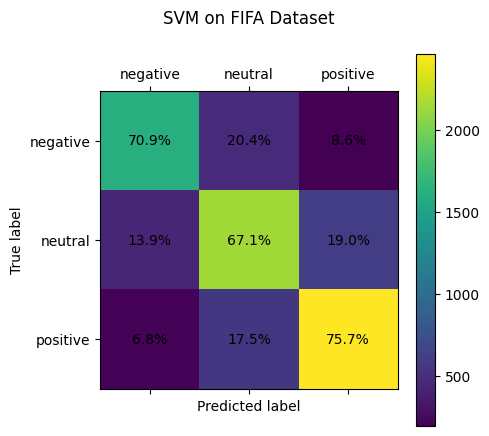  |   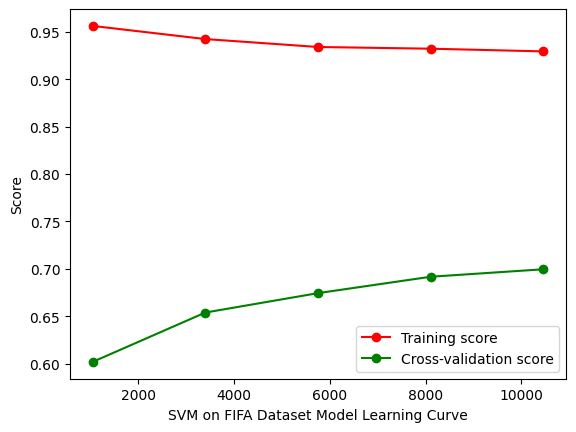

All the following plots were obtained in a very similar way:

SGD Confusion Matrix           |  SGD Learning Curve
:-------------------------:|:-------------------------:
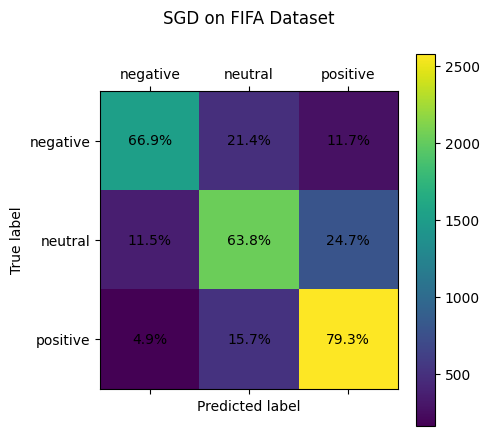  |   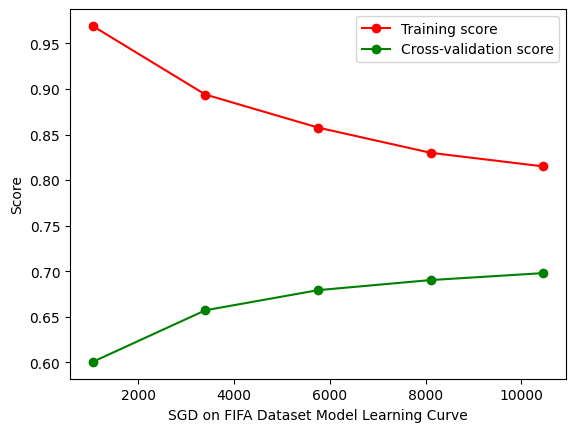

Logistic Regression Confusion Matrix           |  Logistic Regression Learning Curve
:-------------------------:|:-------------------------:
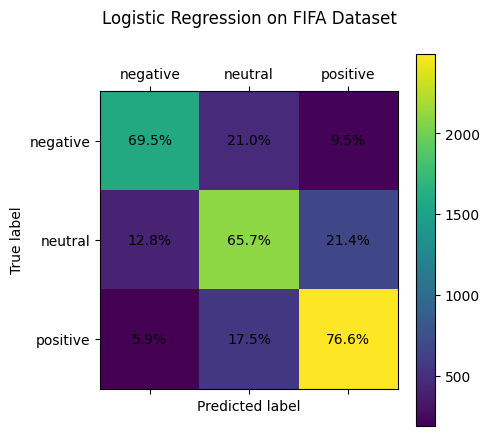  |   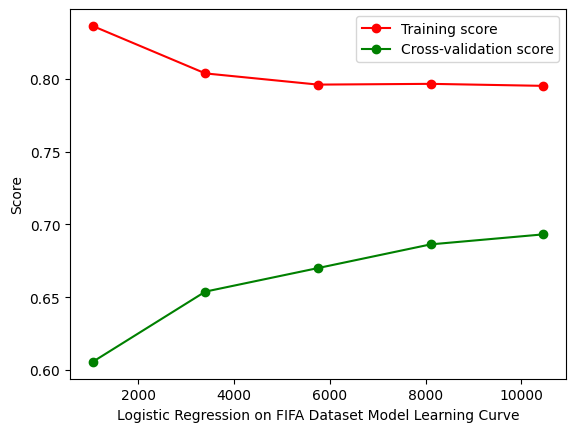

Linear SVM Confusion Matrix           |  Linear SVM Learning Curve
:-------------------------:|:-------------------------:
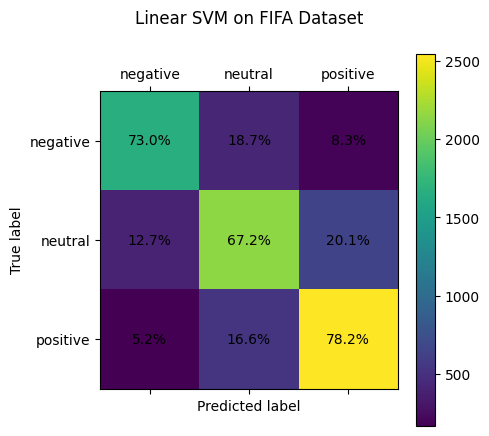  |   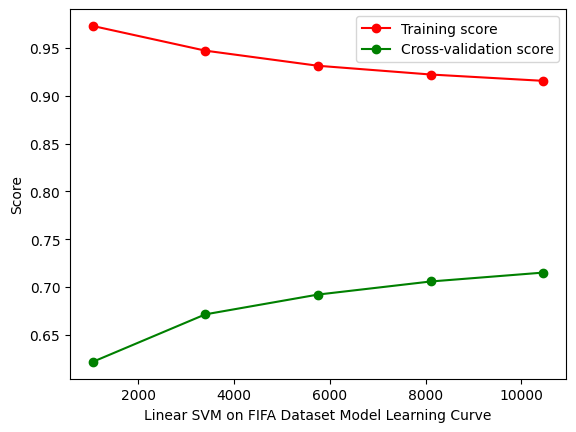

Since these were the best models for a smaller dataset using a train/text split, we wanted to see how well they would do on a larger dataset.

### Training/Fitting on Climate Change Dataset

The climate change dataset (“en_climate_df”) was the largest with over 97k observations and takes the longest time to train and test on. Of the 4 best models mentioned above, the SVM model in particular takes several hours long to get results, so the following sections are only regarding SGD, Logistic Regression, and Linear SVM. In addition to testing on unseen data from the train/test split of the climate change dataset, the trained models will also be tested against the FIFA (“en_fifa_df”, 22k observations) and the cosmos_twitter (“en_cosmos_twitter”, 92k observations) datasets to see how well it can generalize. The full code is available on “COGS118A model training.ipynb” (The subsection of SVM should not be considered). 

### Overall Results in Generalizing to Other Datasets

The three models (SGD, Logistic Regression, and Linear SVM) have once again achieved an accuracy of 0.70 or better when testing on unseen data from the same climate dataset. However, for all three of these models when tested on the cosmos_twitter and FIFA, their accuracy was about 0.50 each, slightly above expected value (0.33) for 3 categories though still relatively low. 

Below is an overview of the models and their Precision, Recall, and f1-score metrics as a bullet points for the unseen climate data, cosmos_twitter, and FIFA datasets due to having the full report with all the exact numbers being too much to put below. The full metric reports, learning curves, and confusion matrices for all 9 results (3 models, 3 datasets each) are in the second half of “COGS118A model training.ipynb”.

**SDG**: the “neutral” category is **ignored** due to often being 0.00
- Unseen climate data:
    - High Precision overall (0.7 and above)
    - High Recall (0.7 and above)
    - High f1-scores (0.75)
- cosmos_twitter: 
    - Low Precision overall (0.6 or less)
    - Passable Recall, with “negative” and 0.63 and “positive” at 0.73
    - Low f1-scores overall, (0.65 or less)
- FIFA:
    - Low Precision overall, all three categories less than 0.5
    - Passable Recall, with “negative” at 0.64 and “positive” at 0.77
    - Low f1-scores overall (0.6 or less)

**Logistic Regression**: “neutral” category often has metrics less than 0.2
- Unseen climate data:
    - High Precision overall (0.7 or above)
    - High Recall (0.8 or above), except “neutral” at 0.51
    - High f1-scores for “negative” and “positive” (about 0.8), passable for “neutral” (0.61)
- cosmos_twitter:
    - Low Precision overall (0.6 or less)
    - Passable Recall except for “neutral”, with “negative” at 0.67 and “positive” at 0.71
    - Low f1-scores overall, highest being “positive” at 0.65
- FIFA:
    - Low Precision overall (0.6 or less)
    - Passable Recall for “negative” (0.6), high Recall for “positive” (0.8), low Recall for “neutral” (0.07)
    - Low f1-scores overall (0.6 or less)

**Linear SVM**: “neutral” category is handled better here, but still the odd one out
- Unseen climate data:
    - High Precision overall (0.80 or above)
    - High Recall for “negative” and “positive” (0.8 or above), passable for “neutral” at 0.66
    - High f1-scores overall (0.7 or above)
- cosmos_twitter:
    - Passable Precision except for “negative”, with “neutral” at 0.64 and “positive” at 0.6
    - Passable Recall except for “neutral”, with “negative at 0.66 and “positive” at 0.72
    - Low f1-scores overall (0.6 or less), except for “positive” at 0.66
- FIFA:
    - Low Precision overall (0.55 or less)
    - Low Recall (0.6 or less), except for “positive” at 0.77
    - Low f1-scores overall (0.6 or less)

Once again these models have high metrics all around when tested against unseen data from the same dataset they were trained on (climate data), showing similar results to their previous performance with the train/test split on the FIFA dataset shown earlier. However, when tested on another, it has an overall accuracy around 0.50. Because there are three classes, its accuracy is slightly above chance but still not entirely reliable. Across all three models and their performance testing on the non-climate dataset, the “neutral” category was almost always producing the lowest metric score, often barely reaching 0.4. Generally low Precision and f1-scores across all categories for all models, but Recall tends to be passable, being the 0.6-0.7 range most of the time, disregarding the “neutral” category.

### Subsection 5 
Maybe will add CV above or here



# Discussion
These are the counts for each sentiment label for the 4 datasets we used in this project after cleaning and preprocessing them.

| DATASET/CATEGORIES |negative| positive| neutral | total |
| ------------------ | ----------- | ---------- | ----------- | ---------- |
|   en_climate_df    |     46009   |    45002   | 6738  | 97749 |
|  en_cosmos_reddit  |     7835    |    14926   | 8887  | 31648 |
|      en_fifa       |     5668    |    8181    | 7949  | 21798 |

In the first section of Results where the FIFA dataset was used in a train/test split across 12 models, the metric report for all three categories were within range of each other (with a notable exception being Random Forest), no particular one being noticeably higher or lower than the other two. From the table above, it shows that the three categories are also relatively balanced, with “negative” being about 1.5k observations behind the other two, however that did not always mean it was the category with the lowest metric score for a particular model or across all 12 models. Having a balanced number of observations across the categories, likely gave all of the models more to learn from and output more balanced results on the metric reports. In contrast, the climate dataset has almost the same number of observations for the “negative” and “positive” category, but is severely lacking in “neutral”. 

### Interpreting the result

**When trained on the climate dataset and tested on another**, all three models almost always had their lowest metrics associated with “neutral”, due to not having as many observations to learn from. For example in the SGD results, the “neutral” metric was always 0.00 (the precision of 1.00 on cosmos_twitter being ignored). For all three models, Recall on “neutral” was considerably the weakest, almost always less than 0.1 (highest being 0.14 Linear SVM testing on FIFA), bringing down the f1-score. Precision across the board can barely reach 0.6 (highest being 0.64 from Linear SVM testing on cosmos_twitter). 

**Testing on the cosmos_twitter dataset, where the “positive” category is almost double the other two**, the “positive” category had the highest metric score across the board with the exception of Precision from Linear SVM. Between the “positive” and “negative” categories, Precision for this dataset roughly had a difference of 0.25, and Recall had a difference of about 0.05.

**Testing on the FIFA dataset**, where there are still more observations in the “positive” category but at far less of an advantage, “positive” had most but not all of the highest metric scores associated with it. Between the “positive” and “negative” categories, there was less than 0.05 difference for Precision, but a 0.1-0.2 difference in Recall. 

The score differences of Precision and Recall between the “positive” and “negative” categories are basically switched when tested on the cosmos_twitter and FIFA datasets. This may likely be due to cosmos_twitter having such a high difference in the number of “positive” observations to test on compared to FIFA, where “negative” had only about a quarter of difference in number of observations against “positive”, as opposed to cosmos_twitter where it was under half.


### Limitations

In doing this project, we did not actively seek out datasets pertaining to a certain topic, we just wanted datasets that had Twitter/Reddit text with sentiment labels already given. The datasets were all downloaded from Kaggle, some having a specific topic they were collected from/for. In addition, the different owners that provided these Kaggle datasets have likely done different methods of sentiment analysis from each other, which could mean inconsistencies in classification for the same body of text.

To get a good sense of generalization, the dataset it learns and tests on needs to be diverse, but the judgment of “diversity” can be subject to many different opinions. It is hard to truly generalize because everything is already presented in its own categories through hashtags, the people you follow/in your feed, the subreddit communities you are in, etc. Social media is also not representative of text sentiment in general as there are certain populations of people (and the kind of text they put out) present in social media, while others are not. The nature of our data and using these datasets for the training of our own models will be inherently biased and likely have poor generalization as a result. It is unclear if this problem can be fixed by just an increase of training data size. Whether an increase in the diversity (as well as size), and if so to what extent, of training data might be a better way of increasing the performance remains to be researched more thoroughly.

One of the best things we can do to improve the training of our models is to also have more balanced observations across the three sentiment categories so that when testing, one category would not have a clear advantage or difference when looking at its metric report compared to the others, as mentioned in Discussion.

### Ethics & Privacy

Due to the datasets all coming from real people collected through social media, there are ethical concerns over their consent in being part of this project as points of data, even with their words and personal information accessible through the media the data is extracted from (Twitter and Reddit). Proper data cleaning and handling would require giving those people as much anonymity that is possible to be given, such as removing their usernames/handles and even the permalink/id to avoid being traced back to a user or community.

The goal of this project is to see if, given the labels already assigned in some datasets, how well can a model be trained on them to label other datasets? As the data comes from a sample of people in the population of those respective media for certain topics, the text content may be biased towards/against certain topics or communities. Some datasets have already included sentiment labels to indicate if they are positive, negative, or neutral. Using this data in training may contribute to the model’s perceived connotation of those and related texts in unlabeled datasets. Conclusions drawn from those results may be harmful to a degree regardless of actual intent or content because of the nature of applying sentiment analysis. This project and those that are working with it do not show any personal support or opposition for any of the data gathered, and to keep the integrity of the project itself, all usable content (those in the English language) can be used without censorship as to not influence the direction of the model toward our personal preferences.

If any unforeseen issues regarding Ethics & Privacy arise, please, let us know via issues. We will do our best address them in a timely manner.

### Conclusion
Overall, generalization error to different datasets turned out to be the biggest issue that we have faced regardless of the classifier used. Even our best models, SVM, SGD, Logistic Regression, and Linear SVM with accuracies >=0.70 and f1-scores above 0.60 for all three sentiment categories “negative”, “neutral”, and “positive”, couldn't exceed 0.60 accuracy on unseen datasets. This can be due to the relatively small training data and the fact that the models are overfitting the training data or selection bias, meaning that our training dataset isn’t representative of testing datasets (given the fact that data comes from social media and is on different topics).

Our results turned out to be consistent with previous work in the field and suggestions that the biases found in models may be due to the small datasets the models are trained on, which make the models prone to overfitting issues<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews). It looks like sentiment analysis might require different approaches or data-handling techniques, as well as better choices for the datasets we use in the first place; there may be better sources for training than from social media and we can try to focus on a certain sphere of topics (such as all sport related) rather than random or completely different ones (such as sports and climate change done here). 

For future work: Since our results are consistent with the field’s, we suggest looking into more sophisticated sentiment analysis tools and maybe other ways that data can be handled or analyzed. There is a more straightforward option: increase the amount of training data, i.e. training on huge datasets which involve many different types and kinds of text data - but the biggest problem with this approach would be data collection and verification of correct labeling (as we know, garbage in - garbage out) which will take tremendous effort and it still remains unclear whether it would worth it. 

# Footnotes
<a name="fakenews"></a>1.[^](#fakenews): LHoy, N., &amp; Koulouri, T. (2022). Exploring the generalisability of fake news detection models. *2022 IEEE International Conference on Big Data (Big Data)*. https://doi.org/10.1109/bigdata55660.2022.10020583<br> 
<a name="fakenews2"></a>2.[^](#fakenews2): Blackledge, C., &amp; Atapour-Abarghouei, A. (2021). Transforming fake news: Robust generalisable news classification using Transformers. *2021 IEEE International Conference on Big Data (Big Data)*. https://doi.org/10.1109/bigdata52589.2021.9671970<br>
<a name="hatespeech"></a>3.[^](#hatespeech): Yin W, Zubiaga A. 2021. Towards generalisable hate speech detection: a review on obstacles and solutions. *PeerJ Computer Science* 7:e598 https://doi.org/10.7717/peerj-cs.598<br>
<a name="sentian"></a>4.[^](#sentian): Moore, A., & Rayson, P. (2018). Bringing replication and reproduction together with generalisability in NLP: Three reproduction studies for target dependent sentiment analysis. *arXiv preprint arXiv:1806.05219*<br>
<a name="redditclimate"></a>5.[^](#redditclimate): https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset<br>
<a name="twitterredditsentian"></a>6.[^](#twitterredditsentian): https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset<br>
<a name="fifatweets"></a>7.[^](#fifatweets): https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets<br>
<a name="scikit1"></a>8.[^](#scikit1): https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#exercise-2-sentiment-analysis-on-movie-reviews<br>
<a name="featextract"></a>9.[^](#featextract): Zareapoor, M., &amp; K. R, S. (2015). Feature extraction or feature selection for text classification: A case study on phishing email detection. *International Journal of Information Engineering and Electronic Business*, 7(2), 60–65. https://doi.org/10.5815/ijieeb.2015.02.08<br>
<a name="wiki"></a>10.[^](#wiki): https://en.wikipedia.org/wiki/Tf%E2%80%93idf<br>
<a name="medium"></a>11.[^](#medium): https://medium.com/geekculture/text-feature-extraction-3-3-word-embeddings-model-e98f3d270dce<br>
<a name="scikit2"></a>12.[^](#scikit2): https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html<br>
<a name="empstudy"></a>13.[^](#empstudy): Sun, X., Liu, X., Hu, J., &amp; Zhu, J. (2014). Empirical studies on the NLP techniques for source code data preprocessing. *Proceedings of the 2014 3rd International Workshop on Evidential Assessment of Software Technologies*. https://doi.org/10.1145/2627508.2627514<br>
<a name="featextractreview"></a>14.[^](#featextractreview): Asghar, M. Z., Khan, A., Ahmad, S., & Kundi, F. M. (2014). A review of feature extraction in sentiment analysis. *Journal of Basic and Applied Scientific Research*, 4(3), 181-186.<br>
<a name="top8"></a>15.[^](#top8): https://analyticsindiamag.com/top-8-pre-trained-nlp-models-developers-must-know/<br>
<a name="huggingface1"></a>16.[^](#huggingface1): https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis?text=Yay%21%21<br>
<a name="huggingface2"></a>17.[^](#huggingface2): https://huggingface.co/michelecafagna26/gpt2-medium-finetuned-sst2-sentiment?text=yayy%21%21<br>
<a name="confusionMatrix"></a>18.[^](#confusionMatrix): https://en.wikipedia.org/wiki/Confusion_matrix<br>